In [3]:
]add PyPlot

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [=====================================>

Fetching: [========================================>]  100.0 %

  Resolving package versions...
  Installed Parsers ─ v1.0.5
  Installed Colors ── v0.12.1
   Updating `~/Projects/SparseGrids/Project.toml`
 [no changes]
   Updating `~/Projects/SparseGrids/Manifest.toml`
 [no changes]


In [4]:
using PyPlot

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


CONSTANTS - Create a Type

N = # of Points ; L = Domain Size

In [60]:
struct params
    N::Int
    L::Float64
end

In [61]:
p=params(21,1.0)

params(21, 1.0)

Defining the Grid Space

In [62]:
h = p.L/(p.N-1)

0.05

In [63]:
x = [i for i in 1:p.N-1]

20-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20

In [64]:
y = [j for j in 1:p.N-1]

20-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20

In [65]:
xvec=range(0,p.N-1,length=p.N-1)

0.0:1.0526315789473684:20.0

In [66]:
sinx = sin.(x)

20-element Array{Float64,1}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586
  0.6569865987187891
  0.9893582466233818
  0.4121184852417566
 -0.5440211108893698
 -0.9999902065507035
 -0.5365729180004349
  0.4201670368266409
  0.9906073556948704
  0.6502878401571168
 -0.2879033166650653
 -0.9613974918795568
 -0.7509872467716762
  0.14987720966295234
  0.9129452507276277

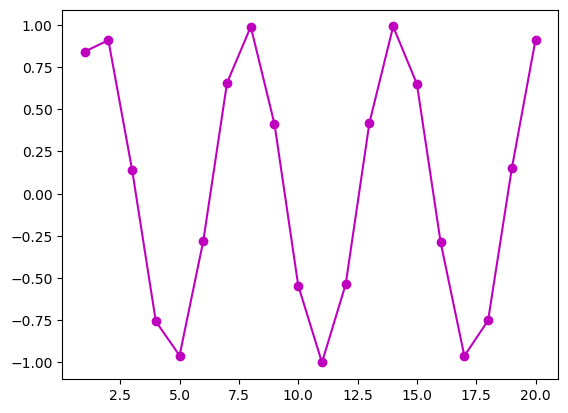

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x151b09bd0>

In [67]:
plot(x,sinx,"m-o")

Function that I want to test

In [68]:
sin2D = zeros(p.N-1,p.N-1)
for i in 1:p.N-1, j in 1:p.N-1
    sin2D[i,j]=sin(i)*cos(j)
end

In [69]:
cos2D = zeros(p.N-1,p.N-1)
for i in 1:p.N-1, j in 1:p.N-1
    cos2D[i,j]=cos(i)*cos(j)
end

In [70]:
struct Test
    h::Float64
    test::Array
end

In [71]:
sin2Dtype=Test(h,sin2D)

Test(0.05, [0.4546487134128409 -0.35017548837401463 … 0.8319662487496519 0.34338921443655185; 0.49129549643388193 -0.37840124765396416 … 0.8990265652078064 0.3710679687406361; … ; 0.08097900197797579 -0.06237092667175042 … 0.14818428935469266 0.061162200738095626; 0.4932664240995042 -0.37991927803104003 … 0.9026331855459921 0.37255658023967436])

In [72]:
function dudx(u::Test,i::Int64,j::Int64)
    if i==1 
        du = (u.test[i+1,j]-u.test[i,j])/u.h
    elseif i==N
        du = (u.test[i,j]-u.test[i-1,j])/u.h
    else
        du=(u.test[i+1,j]-u.test[i-1,j]/2*u.h)
    end
    return du
    
end

dudx (generic function with 1 method)

In [73]:
dSindx=zeros(p.N-1,p.N-1)
for i in 1:p.N-1
    for j in 1:p.N-1
    dSindx[i,j]=dudx(sin2Dtype,i,j)
    end  
end

UndefVarError: UndefVarError: N not defined

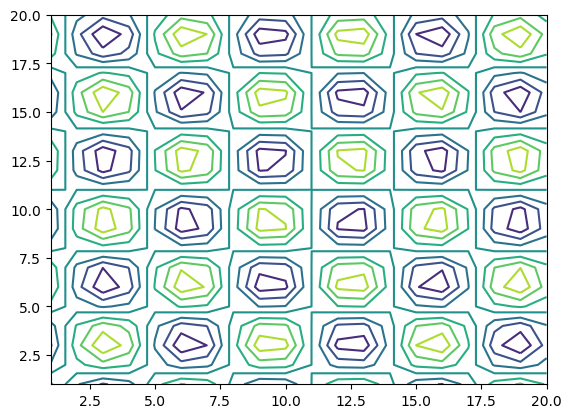

PyObject <matplotlib.contour.QuadContourSet object at 0x151c99ed0>

In [74]:
contour(x,y,cos2D)

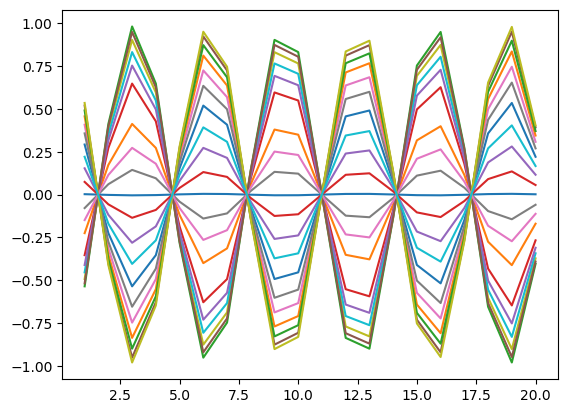

20-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x150b249d0>
 PyObject <matplotlib.lines.Line2D object at 0x150b24bd0>
 PyObject <matplotlib.lines.Line2D object at 0x150b116d0>
 PyObject <matplotlib.lines.Line2D object at 0x150b11b50>
 PyObject <matplotlib.lines.Line2D object at 0x150b11f50>
 PyObject <matplotlib.lines.Line2D object at 0x150b11cd0>
 PyObject <matplotlib.lines.Line2D object at 0x150b11850>
 PyObject <matplotlib.lines.Line2D object at 0x150b11350>
 PyObject <matplotlib.lines.Line2D object at 0x150b11dd0>
 PyObject <matplotlib.lines.Line2D object at 0x150b11f10>
 PyObject <matplotlib.lines.Line2D object at 0x1519a4a10>
 PyObject <matplotlib.lines.Line2D object at 0x1509b4d90>
 PyObject <matplotlib.lines.Line2D object at 0x1509b4d10>
 PyObject <matplotlib.lines.Line2D object at 0x1509b4dd0>
 PyObject <matplotlib.lines.Line2D object at 0x1509a9450>
 PyObject <matplotlib.lines.Line2D object at 0x150b09410>
 PyObject <matplotlib.lines.Line2D 

In [51]:
plot(x,cos2D)